## Short tutorial showing how trends can be computed within pyaerocom

Details regarding the trends computation routine can be found here (methods section):

https://aerocom-trends.met.no/

In [1]:
import pyaerocom as pya

Initating pyaerocom configuration


Checking database access...


Checking access to: /lustre/storeA


Access to lustre database: True


Init data paths for lustre


Expired time: 0.016 s


In [2]:
obsdata = pya.io.ReadUngridded().read('AeronetSunV3Lev2.daily', 'od550aer')
obsdata

UngriddedData <networks: ['AeronetSunV3Lev2.daily']; vars: ['od550aer']; instruments: ['sun_photometer'];No. of stations: 1230

In [3]:
trends_engine = pya.trends_helpers.TrendsEngine()

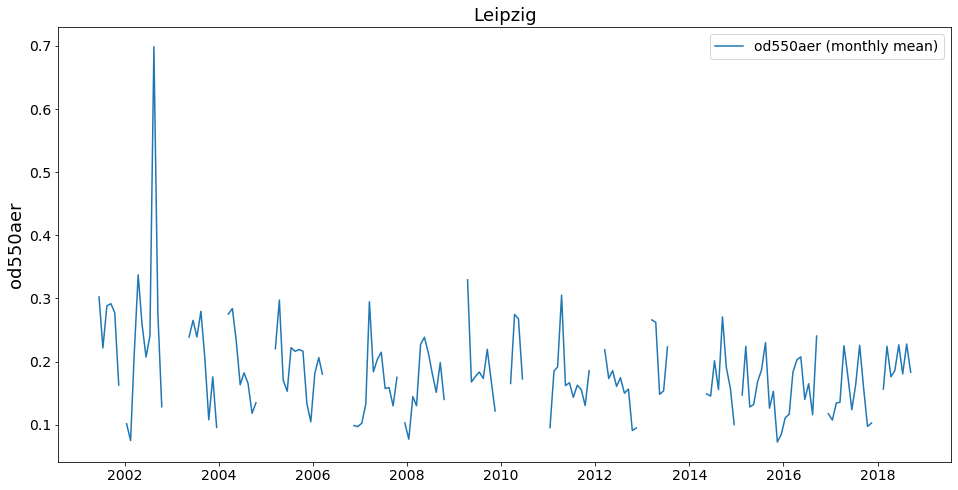

In [4]:
leipzig = obsdata.to_station_data('Leipzig')
leipzig.plot_timeseries('od550aer', freq='monthly')

In [5]:
trend_info = leipzig.compute_trend('od550aer')
trend_info

{'pval': 0.07433498084899375,
 'm': -0.003086717318214402,
 'm_err': 0.001221428677173954,
 'n': 15,
 'y_mean': 0.1770474435541329,
 'y_min': 0.1434634180318197,
 'y_max': 0.24099296150814278,
 'coverage': None,
 'slp': -1.5142800744263278,
 'slp_err': 0.6112855317780068,
 'reg0': 0.20384058209203992,
 't0': None,
 'slp_2001': -1.4916916844764267,
 'slp_2001_err': 0.603290719703447,
 'reg0_2001': 0.20692729941025434,
 'yoffs': 0.3026155362749008,
 'period': '2001-2018'}

These results are stored in the station data object:

In [6]:
leipzig.trends

OrderedDict([('od550aer',
              <pyaerocom.trends_helpers.TrendsEngine at 0x7f585d901630>)])

The actual trends result data can be accessed via the instance of the `TrendsEngine` class that is stored in the `trends` attribute of the `StationData` object:

In [7]:
leipzig.trends['od550aer'].results

OrderedDict([('all',
              OrderedDict([('2001-2018',
                            {'pval': 0.07433498084899375,
                             'm': -0.003086717318214402,
                             'm_err': 0.001221428677173954,
                             'n': 15,
                             'y_mean': 0.1770474435541329,
                             'y_min': 0.1434634180318197,
                             'y_max': 0.24099296150814278,
                             'coverage': None,
                             'slp': -1.5142800744263278,
                             'slp_err': 0.6112855317780068,
                             'reg0': 0.20384058209203992,
                             't0': None,
                             'slp_2001': -1.4916916844764267,
                             'slp_2001_err': 0.603290719703447,
                             'reg0_2001': 0.20692729941025434,
                             'yoffs': 0.3026155362749008,
                             'period': 

Here, the first layer corresponds to the season, and the second layer corresponds to the period.

Plotting the trend can be done by using the plotting method of the `TrendsEngine` class:

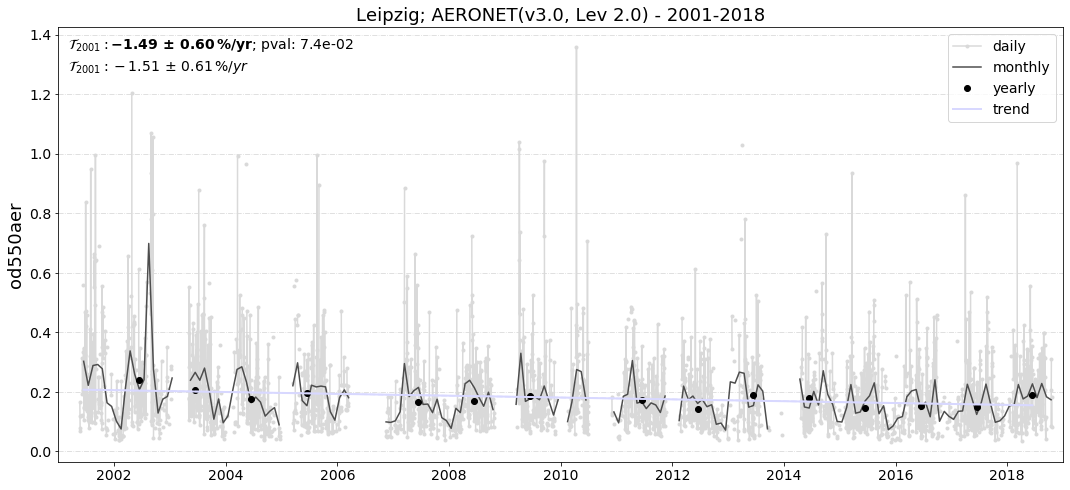

In [8]:
leipzig.trends['od550aer'].plot();

#### Wrap up: Do the same for other stations:

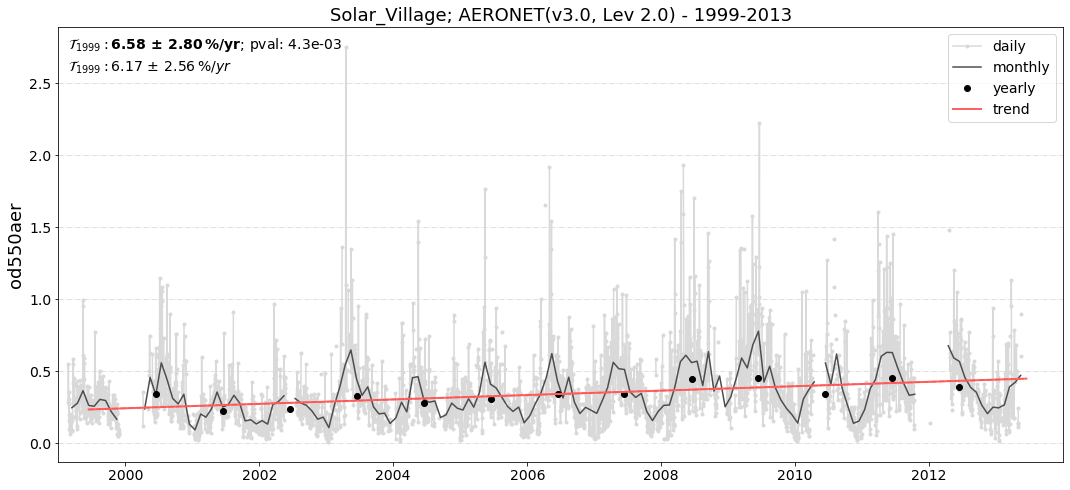

In [9]:
sv = obsdata.to_station_data('Solar_Village')
sv.compute_trend('od550aer')
sv.trends['od550aer'].plot();

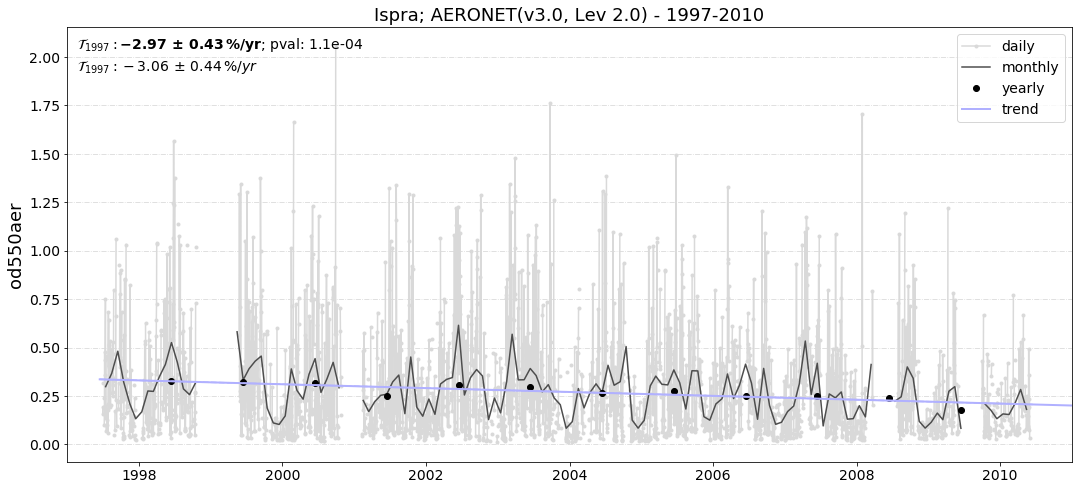

In [10]:
sv = obsdata.to_station_data('Ispra')
sv.compute_trend('od550aer')
sv.trends['od550aer'].plot();